We want to define a python class that will represent a handball pitch, containing the 2d coordinates of specific keypoints on the pitch. We can store these keypoints maybe inside a dict, and each point will be a tuple of (x,y) 2d values which we will hardcode(by geometrically calculating the coordinates according to the constraints provided by the rules of the game - handball). each point will have a name(e.g. 7m-left-up, 7m-right-down, etc) that should identify it, and also a number(that lets us represent each point as a class for machine learning models later on). Now, the points we want to define, at first:

- 7m line's endpoints(up and down), for the left side and for the right side
- 4m goalkeeper line's endpoints(up and down), for the left side and for the right side
- 4 corners of the pitch
- intersection points between 6m line and the goal lines(up and down) for the left side and for the right side
- intersection points between free throw line(9m line) and the side lines of the pitch
- intersection points between the middle line and the center circle
- intersection points between the middle line and the side lines
- the lowest points of the goal posts, on the goal line(for left and right sides) For the coordinates, let's consider that the origin is at the center of the pitch (0.0,0.0). We should also make constants for:
- length of the pitch:40m
- width of the pitch: 20m
goal width: 3m

In [ ]:
class HandballPitch:
    PITCH_LENGTH = 40.0
    PITCH_WIDTH = 20.0
    GOAL_WIDTH = 3.0
    GOAL_AREA_DISTANCE = 6.0
    FREE_THROW_DISTANCE = 9.0
    PENALTY_DISTANCE = 7.0
    GOALKEEPER_DISTANCE = 4.0
    PENALTY_LINE_LENGTH = 1.0
    GOALKEEPER_LINE_LENGTH = 0.15
    FREE_THROW_SIDELINE_INTERSECTION_LENGTH = 2.958

    def __init__(self):
        hw,hl,gw = self.PITCH_WIDTH/2, self.PITCH_LENGTH/2, self.GOAL_WIDTH/2
        
        self.keypoints = dict(
            corner_left_up=(-hl, hw), corner_left_down=(-hl, -hw),
            corner_right_up=(hl, hw), corner_right_down=(hl, -hw),
            seven_left_up=(-hl + self.PENALTY_DISTANCE, self.PENALTY_LINE_LENGTH/2.0), seven_left_down=(-hl + self.PENALTY_DISTANCE, -self.PENALTY_LINE_LENGTH/2.0),
            seven_right_up=(hl - self.PENALTY_DISTANCE, self.PENALTY_LINE_LENGTH/2.0), seven_right_down=(hl - self.PENALTY_DISTANCE, -self.PENALTY_LINE_LENGTH/2.0),
            four_left_up=(-hl + self.GOALKEEPER_DISTANCE, self.GOALKEEPER_LINE_LENGTH/2.0), four_left_down=(-hl + self.GOALKEEPER_DISTANCE, -self.GOALKEEPER_LINE_LENGTH/2.0),
            four_right_up=(hl - self.GOALKEEPER_DISTANCE, self.GOALKEEPER_LINE_LENGTH/2.0), four_right_down=(hl - self.GOALKEEPER_DISTANCE, -self.GOALKEEPER_LINE_LENGTH/2.0),
            six_goalline_left_up=(-hl, self.GOAL_AREA_DISTANCE + gw), six_goalline_left_down=(-hl, -self.GOAL_AREA_DISTANCE - gw),
            six_goalline_right_up=(hl, self.GOAL_AREA_DISTANCE + gw), six_goalline_right_down=(hl, -self.GOAL_AREA_DISTANCE - gw),
            nine_sideline_left_up=(-hl + self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, hw), nine_sideline_left_down=(-hl + self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, -hw),
            nine_sideline_right_up=(hl - self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, hw), nine_sideline_right_down=(hl - self.FREE_THROW_SIDELINE_INTERSECTION_LENGTH, -hw),
            middle_sideline_up=(0.0, hw), middle_sideline_down=(0.0, -hw),
            goal_post_left_up=(-hl, gw), goal_post_left_down=(-hl, -gw),
            goal_post_right_up=(hl, gw), goal_post_right_down=(hl, -gw)
        )
        
        self.keypoint_ids = {k: i for i,k in enumerate(self.keypoints.keys(), 1)}

h = HandballPitch()
print(h.keypoints)

{'corner_left_up': (-20.0, 10.0), 'corner_left_down': (-20.0, -10.0), 'corner_right_up': (20.0, 10.0), 'corner_right_down': (20.0, -10.0), 'seven_left_up': (-13.0, 0.5), 'seven_left_down': (-13.0, -0.5), 'seven_right_up': (13.0, 0.5), 'seven_right_down': (13.0, -0.5), 'four_left_up': (-16.0, 0.075), 'four_left_down': (-16.0, -0.075), 'four_right_up': (16.0, 0.075), 'four_right_down': (16.0, -0.075), 'six_goalline_left_up': (-20.0, 7.5), 'six_goalline_left_down': (-20.0, -7.5), 'six_goalline_right_up': (20.0, 7.5), 'six_goalline_right_down': (20.0, -7.5), 'nine_sideline_left_up': (-17.042, 10.0), 'nine_sideline_left_down': (-17.042, -10.0), 'nine_sideline_right_up': (17.042, 10.0), 'nine_sideline_right_down': (17.042, -10.0), 'middle_sideline_up': (0.0, 10.0), 'middle_sideline_down': (0.0, -10.0), 'goal_post_left_up': (-20.0, 1.5), 'goal_post_left_down': (-20.0, -1.5), 'goal_post_right_up': (20.0, 1.5), 'goal_post_right_down': (20.0, -1.5)}


Now we will implement a draw_pitch function for this class, that will draw the keypoints of the class and uniting them with lines accordingly. For the 9m and goal area lines we will draw them according to the rules of the game:In front of each goal there is a goal area (see diagram 5). The goal area is defined by the goal-area line (6-metre line), which is drawn as follows: a. 3 metres long line directly in front of the goal; this line is parallel to the goal line and 6 metres away from it (measured from the rear edge of the goal line to the front edge of the goal-area line); b. two quarter circles, each with a radius of 6 metres (measured from the rear inner corner of the goalposts), connecting the 3 metres long line with the outer goal line (see diagrams 1a, 1b and 2a). 5. The free throw line (9-metre line) is a broken line, drawn 3 metres outside the goal-area line. Both the segments of the line and the spaces between them measure 15 cm (see diagrams 1a and 1b). 6. The 7-metre line is a 1 metre long line, directly in front of the goal. It is parallel to the goal line and 7 metres away from it (measured from the rear edge of the goal line to the front edge of the 7-metre line); (see diagrams 1a and 1b). 7. The goalkeeper’s restraining line (the 4-metre line) is a 15 cm long line, directly in front of the goal. It is parallel to the goal line and 4 metres away from it (measured from the rear edge of the goal line to the front edge of the 4-metre line) (see diagrams 1a and 1b).


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from fastcore.utils import patch

@patch
def draw_pitch(self:HandballPitch, ax=None, figsize=(12,8), save_path=None):
    "Draw handball pitch with all lines and keypoints"
    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    hw,hl,gw = self.PITCH_WIDTH/2, self.PITCH_LENGTH/2, self.GOAL_WIDTH/2

    ax.plot([-hl,-hl,hl,hl,-hl], [-hw,hw,hw,-hw,-hw], 'b-', linewidth=2)
    ax.plot([0,0], [-hw,hw], 'b-', linewidth=2)
    
    ax.plot([-hl+self.PENALTY_DISTANCE,-hl+self.PENALTY_DISTANCE], [-0.5,0.5], 'b-', linewidth=2)
    ax.plot([hl-self.PENALTY_DISTANCE,hl-self.PENALTY_DISTANCE], [-0.5,0.5], 'b-', linewidth=2)
    
    ax.plot([-hl+self.GOALKEEPER_DISTANCE,-hl+self.GOALKEEPER_DISTANCE], [-0.075,0.075], 'b-', linewidth=2)
    ax.plot([hl-self.GOALKEEPER_DISTANCE,hl-self.GOALKEEPER_DISTANCE], [-0.075,0.075], 'b-', linewidth=2)
    
    ax.plot([-hl+self.GOAL_AREA_DISTANCE,-hl+self.GOAL_AREA_DISTANCE], [gw,-gw], 'b-', linewidth=2)
    ax.plot([hl-self.GOAL_AREA_DISTANCE,hl-self.GOAL_AREA_DISTANCE], [gw,-gw], 'b-', linewidth=2)

    ax.plot([-hl+self.FREE_THROW_DISTANCE,-hl+self.FREE_THROW_DISTANCE], [gw,-gw], 'b--', linewidth=2)
    ax.plot([hl-self.FREE_THROW_DISTANCE,hl-self.FREE_THROW_DISTANCE], [gw,-gw], 'b--', linewidth=2)
    
    arc_left_up = Arc((-hl, gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=0, theta2=90, color='b', linewidth=2)
    arc_left_down = Arc((-hl, -gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=270, theta2=360, color='b', linewidth=2)
    arc_right_up = Arc((hl, gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=90, theta2=180, color='b', linewidth=2)
    arc_right_down = Arc((hl, -gw), 2*self.GOAL_AREA_DISTANCE, 2*self.GOAL_AREA_DISTANCE, angle=0, theta1=180, theta2=270, color='b', linewidth=2)
    ax.add_patch(arc_left_up); ax.add_patch(arc_left_down); ax.add_patch(arc_right_up); ax.add_patch(arc_right_down)
    
    nine_dist = self.GOAL_AREA_DISTANCE + 3
    arc_nine_left_up = Arc((-hl, gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=0, theta2=90, color='b', linewidth=2, linestyle='--')
    arc_nine_left_down = Arc((-hl, -gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=270, theta2=360, color='b', linewidth=2, linestyle='--')
    arc_nine_right_up = Arc((hl, gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=90, theta2=180, color='b', linewidth=2, linestyle='--')
    arc_nine_right_down = Arc((hl, -gw), 2*nine_dist, 2*nine_dist, angle=0, theta1=180, theta2=270, color='b', linewidth=2, linestyle='--')
    ax.add_patch(arc_nine_left_up); ax.add_patch(arc_nine_left_down); ax.add_patch(arc_nine_right_up); ax.add_patch(arc_nine_right_down)
    
    for name,(x,y) in self.keypoints.items(): ax.plot(x, y, 'ro', markersize=4)
    
    ax.set_aspect('equal'); ax.set_xlim(-hl, hl); ax.set_ylim(-hw, hw); ax.grid(True, alpha=0.3); ax.set_axis_off();

    if save_path:
        fig.savefig(save_path, bbox_inches='tight', pad_inches=0, dpi=150)
        plt.close(fig)
    
    return ax

<Axes: >

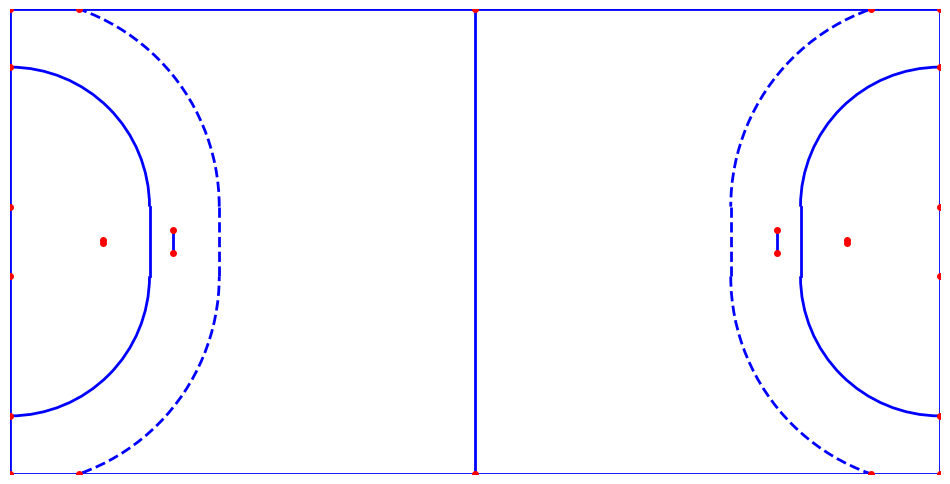

In [ ]:
h.draw_pitch()


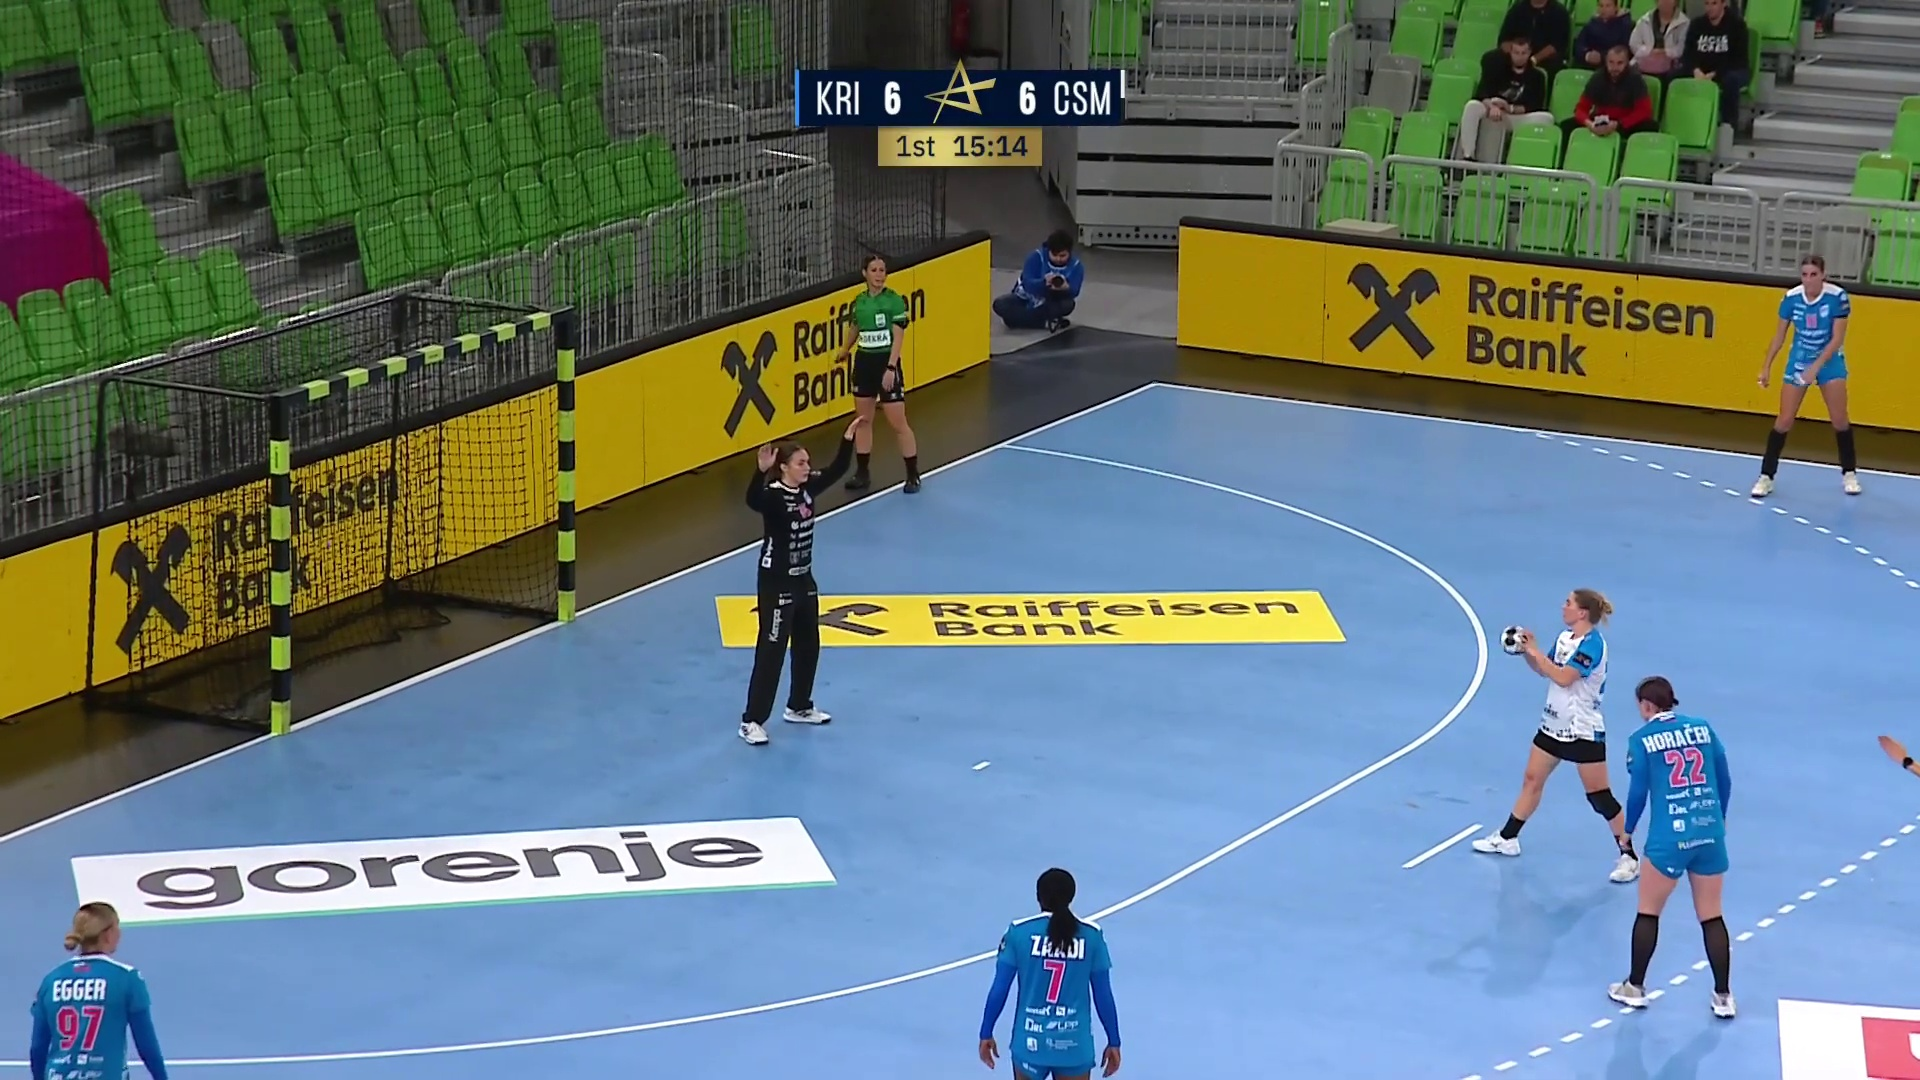

In [ ]:
from PIL import Image

img = Image.open('sampled_frames/frame_003.jpg')
img

Now implement a new method for the initial class(HandballPitch), that finds the homography matrix between an image and the 2d plane, given a set of points and their coordinates. The 2d coordinates will be fetched from the class' constants by their names. 
The function input param should be a dict with keypoints names as keys and image coordinates as values
Also make a mock call for that function.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
import cv2

@patch
def find_homography(self:HandballPitch, img_pts):
    "Find homography matrix from image points to pitch coordinates"
    pitch_pts = np.array([self.keypoints[k] for k in img_pts.keys()], dtype=np.float32)
    img_pts_arr = np.array(list(img_pts.values()), dtype=np.float32)
    H,_ = cv2.findHomography(img_pts_arr, pitch_pts)
    return H
```

```python
mock_img_pts = dict(corner_left_up=(100,50), corner_right_up=(900,50), corner_right_down=(900,550), corner_left_down=(100,550))
H = h.find_homography(mock_img_pts)
H
```

In [ ]:
import cv2
import numpy as np

@patch
def find_homography(self:HandballPitch, img_pts):
    "Find homography matrix from image points to pitch coordinates"
    pitch_pts = np.array([self.keypoints[k] for k in img_pts.keys()], dtype=np.float32)
    img_pts_arr = np.array(list(img_pts.values()), dtype=np.float32)
    H,_ = cv2.findHomography(img_pts_arr, pitch_pts)
    return H
mock_img_pts = dict(corner_left_up=(1155.9,384.3), six_goalline_left_up=(1002.8,445.5), seven_left_up=(1478.8,824.9), seven_left_down=(1406.6,866.6))
H = h.find_homography(mock_img_pts)
H

array([[ 8.93028468e-03,  2.35608048e-03, -3.93994708e+01],
       [ 6.24304778e-03, -3.44279380e-02,  2.01000735e+01],
       [ 1.16086735e-05,  1.02825186e-03,  1.00000000e+00]])

I actually want the image at image_path to be fully visible when I plot the pitch over it, so I want the pitch to be warped according to the image's shape. So I want the pitch to be warped

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
@patch
def warp_pitch_to_image(self:HandballPitch, img_path, img_pts, ax=None, figsize=(12,8)):
    "Warp pitch visualization to match image perspective"
    img = plt.imread(img_path)
    H = self.find_homography(img_pts)
    H_inv = np.linalg.inv(H)
    
    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    
    hw,hl,gw = self.PITCH_WIDTH/2, self.PITCH_LENGTH/2, self.GOAL_WIDTH/2
    
    def transform_pts(pts):
        pts = np.array(pts, dtype=np.float32).reshape(-1,1,2)
        return cv2.perspectiveTransform(pts, H_inv).reshape(-1,2)
    
    outline = transform_pts([[-hl,-hw],[-hl,hw],[hl,hw],[hl,-hw],[-hl,-hw]])
    ax.plot(outline[:,0], outline[:,1], 'r-', linewidth=2)
    
    midline = transform_pts([[0,-hw],[0,hw]])
    ax.plot(midline[:,0], midline[:,1], 'r-', linewidth=2)
    
    for name,(x,y) in self.keypoints.items():
        pt = transform_pts([[x,y]])[0]
        ax.plot(pt[0], pt[1], 'ro', markersize=4)
    
    ax.set_axis_off()
    return ax
```

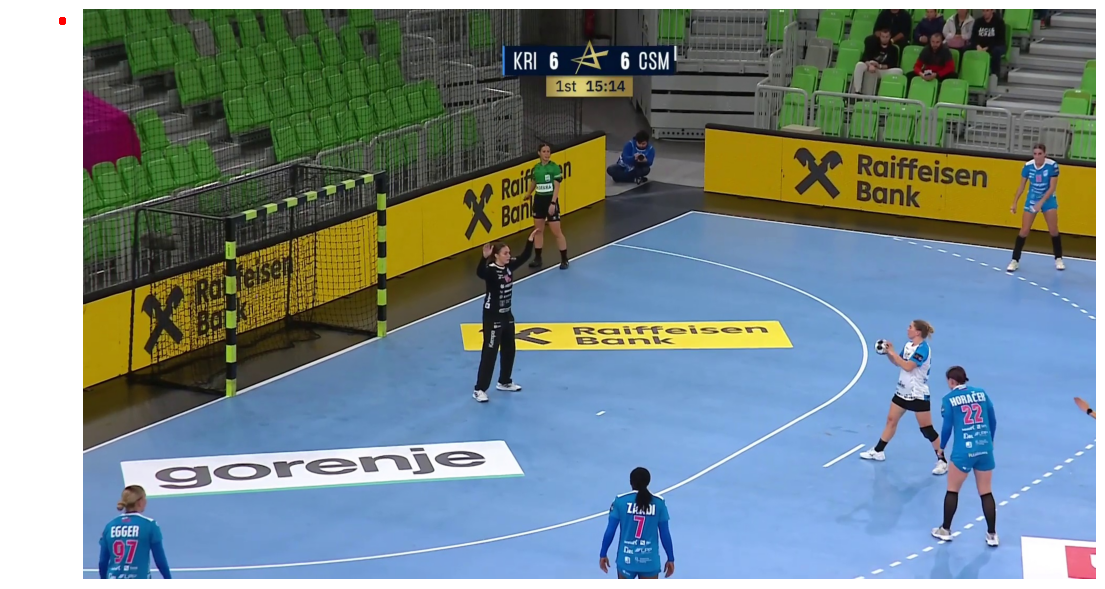

In [ ]:
@patch
def show_warped_pitch_on_image(self:HandballPitch, image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig,ax = plt.subplots(figsize=(14,10))
    ax.imshow(img)

    pitch_corners = np.array([[-20,-10], [20,-10], [20,10], [-20,10], [-20,-10]], dtype=np.float32)
    img_corners = cv2.perspectiveTransform(pitch_corners.reshape(-1,1,2), np.linalg.inv(H)).reshape(-1,2)
    ax.plot(img_corners[:,0], img_corners[:,1], 'r-', linewidth=2)

    for name,pt in self.keypoints.items():
        img_pt = cv2.perspectiveTransform(np.array([[pt]], dtype=np.float32), np.linalg.inv(H))[0,0]
        ax.plot(img_pt[0], img_pt[1], 'ro', markersize=4)

    ax.set_axis_off()

h.show_warped_pitch_on_image('sampled_frames/frame_003.jpg')

In [ ]:
h.draw_pitch(save_path='pitch_template.jpg')

<Axes: >

Let's get this straight. I want the image at image_path to be fully visible when I plot the pitch over it, so I want the pitch to be warped according to the image's shape. Basically only part of the 2d plane we get using the homography matrix should be visible, and the rest should be cut off. So I want the pitch to be warped according to the image's shape. The 2d plane is saved at pitch_template.jpg. So we should load it from there and then warp it accordingly.
However, keep in mind that the 3d image shape is (1080, 1920, 3), whereas the 2d pitch template is not that shape.
The main thing to consider is that I do not to plot the keypoints of the 2d plane onto the 3d image, like show_warped_pitch_on_image does already. I want to plot the entire 2d plane but warped according to the Homography matrix, onto the 3d image, and that includes lines, curbs, arcs and so on, without considering individual keypoints themselves.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

```python
@patch
def warp_pitch_overlay(self:HandballPitch, img_path, img_pts, ax=None, figsize=(12,8), alpha=0.5):
    "Warp 2d pitch template onto image using homography"
    img = plt.imread(img_path)
    pitch_template = plt.imread('pitch_template.jpg')
    H = self.find_homography(img_pts)
    H_inv = np.linalg.inv(H)
    
    warped = cv2.warpPerspective(pitch_template, H_inv, (img.shape[1], img.shape[0]))
    
    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.imshow(warped, alpha=alpha)
    ax.set_axis_off()
    return ax
```